In [57]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing.image import load_img, img_to_array
import urllib, PIL
import numpy as np

In [59]:
model = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 35s 0us/step


In [119]:
img = load_img('adolf.jpeg')

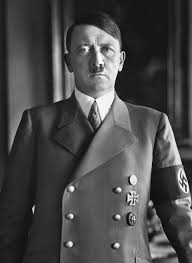

In [120]:
img

In [121]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [123]:
img_array = img_to_array(img)

In [124]:
img_array

array([[[32., 32., 32.],
        [30., 30., 30.],
        [27., 27., 27.],
        ...,
        [49., 49., 49.],
        [60., 60., 60.],
        [67., 67., 67.]],

       [[32., 32., 32.],
        [30., 30., 30.],
        [27., 27., 27.],
        ...,
        [49., 49., 49.],
        [60., 60., 60.],
        [67., 67., 67.]],

       [[32., 32., 32.],
        [30., 30., 30.],
        [27., 27., 27.],
        ...,
        [49., 49., 49.],
        [60., 60., 60.],
        [67., 67., 67.]],

       ...,

       [[27., 27., 27.],
        [28., 28., 28.],
        [29., 29., 29.],
        ...,
        [62., 62., 62.],
        [74., 74., 74.],
        [81., 81., 81.]],

       [[28., 28., 28.],
        [28., 28., 28.],
        [29., 29., 29.],
        ...,
        [58., 58., 58.],
        [73., 73., 73.],
        [82., 82., 82.]],

       [[28., 28., 28.],
        [29., 29., 29.],
        [29., 29., 29.],
        ...,
        [56., 56., 56.],
        [72., 72., 72.],
        [82., 82., 82.]]

In [125]:
import matplotlib.pyplot as plt
import cv2

In [126]:
img_array.shape

(263, 192, 3)

In [127]:
img_array = cv2.resize(img_array, (224,224))

In [128]:
img_array.shape

(224, 224, 3)

In [129]:
# preprocess the input 
img_pre = preprocess_input(img_array)

In [131]:
# reshape the image 
img_pre = img_pre.reshape(1,224,224,3)

In [132]:
# predict the class 
result = model.predict(img_pre)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


In [133]:
predictions = decode_predictions(result)

In [134]:
predictions

[[('n04350905', 'suit', 0.39563826),
  ('n04591157', 'Windsor_tie', 0.15828994),
  ('n04479046', 'trench_coat', 0.073746786),
  ('n02883205', 'bow_tie', 0.059151728),
  ('n10148035', 'groom', 0.046106312)]]

Text(0.5, 1.0, 'scorpion')

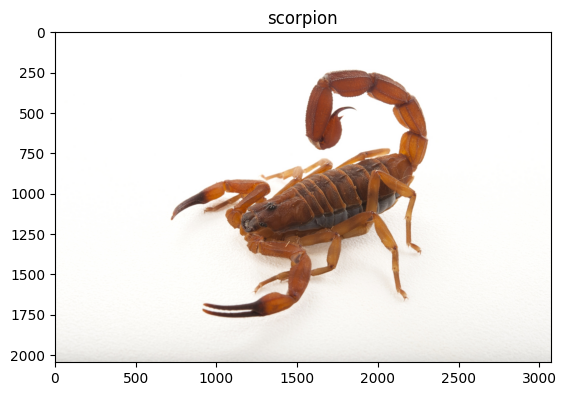

In [135]:
url = 'https://i.natgeofe.com/n/80d64271-fbea-46cb-8982-13af8c9c0f56/scorpions_03.jpg'
img = np.array(PIL.Image.open(urllib.request.urlopen(url)))
plt.imshow(img)
img = cv2.resize(img, (224, 224))
img = preprocess_input(img)
model = VGG16()
result = model.predict(img.reshape(1, 224, 224, 3), verbose=False)
plt.title(decode_predictions(result)[0][0][1])